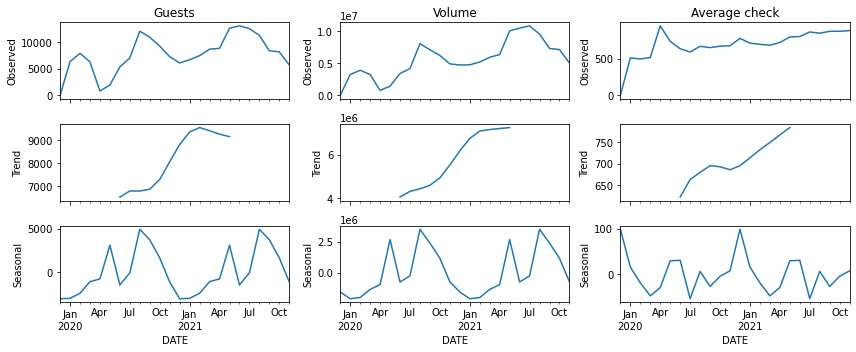

In [12]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import matplotlib

import statsmodels.api as sm
from matplotlib import pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('/opt/anaconda3/futuraplan.csv',index_col=0)
df.set_index([pd.to_datetime(df.index)], inplace=True)

guests = df['GUESTS']
vol = df['VOL']
check_av = df['AVCHECK']

#Split dataset 80/20 as train and test sets
train, test = train_test_split(df,shuffle=False, test_size=0.2)

#seasonal trends in data metrics
res1 = sm.tsa.seasonal_decompose(guests.interpolate(), model='additive', freq=12)
res2 = sm.tsa.seasonal_decompose(vol.interpolate(), model='additive', freq=12)
res3 = sm.tsa.seasonal_decompose(check_av.interpolate(), model='additive', freq=12)

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    
fig, axes = plt.subplots(ncols=3, nrows=3, sharex=True, figsize=(12,5))
axes[0,0].set_title("Guests")
axes[0,1].set_title("Volume")
axes[0,2].set_title("Average check")
    
plotseasonal(res1, axes[:,0])
plotseasonal(res2, axes[:,1])
plotseasonal(res3, axes[:,2])

fig.tight_layout()
plt.show()

#for checking results
#print(test_V)
#df.head()


ADF Statistic: -0.179326
p-value: 0.940941
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691


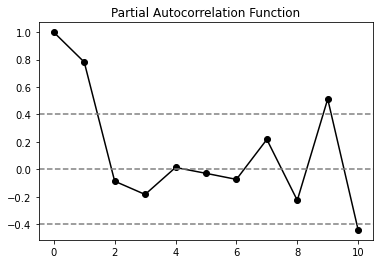

In [13]:
#PACF-ACF for descision about model parameters for SARIMAX
def df_test(ts):
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
df_test(vol)
lag_pacf = pacf(vol, nlags=10)

#Plot PACF: 
plt.plot(lag_pacf, 'ok-')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(vol)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(vol)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function');


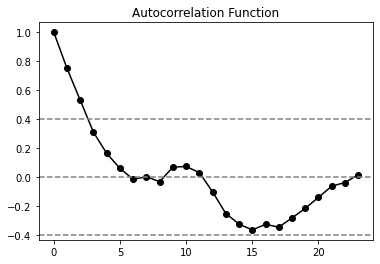

In [14]:
lag_acf = acf(vol, nlags=40)

#Plot ACF: 
plt.plot(lag_acf, 'ok-')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(vol)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(vol)),linestyle='--',color='gray')
plt.title('Autocorrelation Function');

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.93852D+00    |proj g|=  1.44821D-01

At iterate    1    f=  8.88209D+00    |proj g|=  6.26976D-02

At iterate    2    f=  8.87383D+00    |proj g|=  1.06300D-01

At iterate    3    f=  8.86008D+00    |proj g|=  3.58123D-02

At iterate    4    f=  8.85534D+00    |proj g|=  2.98865D-02

At iterate    5    f=  8.85373D+00    |proj g|=  1.90821D-02

At iterate    6    f=  8.85323D+00    |proj g|=  6.46832D-03

At iterate    7    f=  8.85319D+00    |proj g|=  5.09805D-04

At iterate    8    f=  8.85319D+00    |proj g|=  3.29641D-04

At iterate    9    f=  8.85319D+00    |proj g|=  5.85259D-04

At iterate   10    f=  8.85319D+00    |proj g|=  8.89957D-04

At iterate   11    f=  8.85319D+00    |proj g|=  1.59101D-03

At iterate   12    f=  8.85318D+00    |proj g|=  2.31854D-03

At iterate   13    f=  8.8

 This problem is unconstrained.



At iterate   14    f=  8.85315D+00    |proj g|=  1.74252D-03

At iterate   15    f=  8.85314D+00    |proj g|=  6.93860D-04

At iterate   16    f=  8.85314D+00    |proj g|=  1.63488D-04

At iterate   17    f=  8.85314D+00    |proj g|=  1.67062D-04

At iterate   18    f=  8.85314D+00    |proj g|=  2.81299D-04

At iterate   19    f=  8.85314D+00    |proj g|=  4.87352D-04

At iterate   20    f=  8.85313D+00    |proj g|=  7.57070D-04

At iterate   21    f=  8.85313D+00    |proj g|=  1.51538D-03

At iterate   22    f=  8.85312D+00    |proj g|=  1.50837D-03

At iterate   23    f=  8.85135D+00    |proj g|=  3.54923D-02

At iterate   24    f=  8.85085D+00    |proj g|=  4.80887D-02

At iterate   25    f=  8.84995D+00    |proj g|=  6.27196D-02

At iterate   26    f=  8.84792D+00    |proj g|=  7.88849D-02

At iterate   27    f=  8.84329D+00    |proj g|=  9.17841D-02

At iterate   28    f=  8.83657D+00    |proj g|=  8.26631D-02

At iterate   29    f=  8.83131D+00    |proj g|=  4.72801D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  1.50465D+01    |proj g|=  1.10969D-01

At iterate    4    f=  1.50105D+01    |proj g|=  6.61736D-02

At iterate    5    f=  1.50068D+01    |proj g|=  2.59956D-02

At iterate    6    f=  1.50051D+01    |proj g|=  3.04836D-02

At iterate    7    f=  1.50041D+01    |proj g|=  1.03987D-02

At iterate    8    f=  1.50040D+01    |proj g|=  4.11782D-03

At iterate    9    f=  1.50040D+01    |proj g|=  2.64676D-03

At iterate   10    f=  1.50039D+01    |proj g|=  4.65474D-03

At iterate   11    f=  1.50039D+01    |proj g|=  6.80014D-03

At iterate   12    f=  1.50038D+01    |proj g|=  5.18359D-03

At iterate   13    f=  1.50038D+01    |proj g|=  3.63819D-04

At iterate   14    f=  1.50038D+01    |proj g|=  5.52429D-05

At iterate   15    f=  1.50038D+01    |proj g|=  1.27656D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.60524D+00    |proj g|=  3.62724D-01

At iterate    1    f=  7.52447D+00    |proj g|=  3.42381D-01

At iterate    2    f=  7.46257D+00    |proj g|=  1.47630D-01

At iterate    3    f=  7.44836D+00    |proj g|=  6.44247D-02

At iterate    4    f=  7.44507D+00    |proj g|=  6.38939D-02

At iterate    5    f=  7.42843D+00    |proj g|=  6.22347D-02

At iterate    6    f=  7.35687D+00    |proj g|=  1.12073D-01

At iterate    7    f=  7.20507D+00    |proj g|=  1.55203D-01

At iterate    8    f=  6.70310D+00    |proj g|=  5.56775D-02

At iterate    9    f=  6.36349D+00    |proj g|=  2.56875D-01

At iterate   10    f=  6.25854D+00    |proj g|=  1.77037D-01

At iterate   11    f=  6.19944D+00    |proj g|=  5.78290D-02

At iterate   12    f=  6.18498D+00    |proj g|=  5.26846D-02

At iterate   13    f=  6.17776D+00    |proj g|=  2.17274D-02

At iterate   14    f=  6.17383D+00    |proj g|=  5.31458D-04

At iterate   15 

<AxesSubplot:xlabel='DATE'>

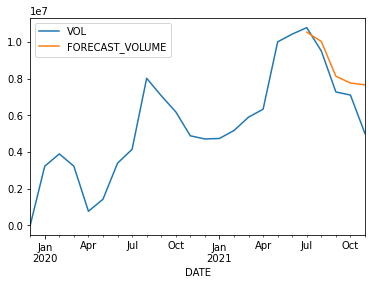

In [15]:
model1 = SARIMAX(guests, order=(1,1,1), seasonal_order=(1,0,1,4))
model2 = SARIMAX(vol, order=(1,1,1), seasonal_order=(1,0,1,4))
model3 = SARIMAX(check_av, order=(1,1,1), seasonal_order=(1,0,0,12))

sarima_res1 = model1.fit(disp=True)
sarima_res2 = model2.fit(disp=True)
sarima_res3 = model3.fit(disp=True)

df['FORECAST_GUESTS']= sarima_res1.predict(start="2021-07-31", end="2022-11-30", dynamic=True) 
df['FORECAST_VOLUME']= sarima_res2.predict(start="2021-07-31", end="2022-11-30", dynamic=True) 
df['FORECAST_AVCHECK']= sarima_res3.predict(start="2021-07-31", end="2022-11-30", dynamic=True) 

df[['VOL','FORECAST_VOLUME']].plot()
